In [71]:
import os
from typing import Dict
from matplotlib import pyplot as plt
import numpy as np

In [72]:
current_dir = os.getcwd()+'/adjusted_buffers'
filepaths = {}
for density_dir in os.listdir(current_dir):
    for encoding_dir in os.listdir(current_dir+'/'+density_dir):
        filepaths[f'{density_dir}-{encoding_dir}'] = f'{current_dir}/{density_dir}/{encoding_dir}/timeloop-mapper.stats.txt'

In [73]:
def parse_specs_and_stats(file_content:str)->Dict[str, str]:
    """
    _summary_

    Args:
        file_content (str): _description_

    Returns:
        Dict[str, str]: _description_
    """
    data = {}
    current_level = None
    lines = file_content.split('\n')
    ln_num = 0

    while ln_num < len(lines) :
        line = lines[ln_num].strip()
        if (line):
            if line[:5] == 'Level':
                # initialise a new dictionary and skip the next few line
                current_level = lines[ln_num + 2].split(' ')[1]
                data[current_level] = {}
                ln_num += 3
            elif line[:4] == 'Area' and current_level:
                if not ('Area' in data[current_level]):
                    area = line.split(': ')
                    data[current_level]['Area'] = float(area[1].split(' ')[0])
                    ln_num += 1
            elif line[:2] == 'fJ':
                compute = float(lines[ln_num + 4].split('= ')[1])
                if 'Algo-Compute' in data:
                    data['Compute'] = compute
                else:
                    data['Algo-Compute'] = compute
                ln_num += 5
        ln_num += 1
    return data

In [74]:
eval_data = {}
for file_key, filename in filepaths.items():
    with open(filename, 'r', encoding='utf-8') as file:
        file_content = file.read()
        eval_data[file_key] = parse_specs_and_stats(file_content)

In [75]:
eval_data

{'density_0.8-run-length-encoding': {'mac': {'Area': 417.0},
  'Buffer': {'Area': 45957.1},
  'BackingStorage': {'Area': 14872.81},
  'Algo-Compute': 10990.29,
  'Compute': 13488.09},
 'density_0.8-huffman-encoding': {'mac': {'Area': 417.0},
  'Buffer': {'Area': 33663.52},
  'BackingStorage': {'Area': 1921.37},
  'Algo-Compute': 3664.49,
  'Compute': 4497.33},
 'density_0.8-bitmask': {'mac': {'Area': 417.0},
  'Buffer': {'Area': 45957.1},
  'BackingStorage': {'Area': 13925.81},
  'Algo-Compute': 10937.66,
  'Compute': 13423.49},
 'density_0.8-no-encoding': {'mac': {'Area': 417.0},
  'Buffer': {'Area': 45910.56},
  'BackingStorage': {'Area': 13619.25},
  'Algo-Compute': 11135.95,
  'Compute': 13666.85},
 'density_0.8-uncompressed-offset-pair': {'mac': {'Area': 417.0},
  'Buffer': {'Area': 47487.98},
  'BackingStorage': {'Area': 17723.04},
  'Algo-Compute': 10675.53,
  'Compute': 13101.79},
 'density_0.8-coordinate-payload': {'mac': {'Area': 417.0},
  'Buffer': {'Area': 45957.1},
  'Back

In [76]:
buffer = {'Encoding': [], 'Area': []}
backingstorage = {'Encoding': [], 'Area': []}
energy = {}
cifar_10 = {'Encoding': [], 'Algo-Compute': [], 'Compute': []}

for filename in sorted(eval_data.keys()):
    encoding = filename.split('-', 1)[1]
    if "density_0.2" in filename: #pull only one of the data sets because its the same for all of them
        buffer['Encoding'].append(encoding)
        buffer['Area'].append(eval_data[filename]['Buffer']['Area'])
        backingstorage['Encoding'].append(encoding)
        backingstorage['Area'].append(eval_data[filename]['BackingStorage']['Area'])

    if "10" not in encoding:
        if encoding not in energy.keys():
            energy[encoding] = {'Compute': [eval_data[filename]['Compute']], 'Algo-Compute': [eval_data[filename]['Algo-Compute']]}
        else: 
            energy[encoding]['Compute'].append(eval_data[filename]['Compute'])
            energy[encoding]['Algo-Compute'].append(eval_data[filename]['Algo-Compute'])
    else:
        name = encoding.split('-', 1)[1]
        cifar_10['Encoding'].append(name)
        cifar_10['Algo-Compute'].append(eval_data[filename]['Algo-Compute'])
        cifar_10['Compute'].append(eval_data[filename]['Compute'])

print(energy)
print(buffer)
print(backingstorage)
print(cifar_10)
        

{'bitmask': {'Compute': [15660.29, 16056.73, 14118.05, 13423.49, 12986.17], 'Algo-Compute': [3480.06, 6541.63, 8889.15, 10937.66, 12986.17]}, 'coordinate-payload': {'Compute': [15694.08, 16100.58, 14263.17, 13580.73, 13151.05], 'Algo-Compute': [3487.57, 6559.5, 8980.51, 11065.78, 13151.05]}, 'huffman-encoding': {'Compute': [4347.79, 4497.33, 4444.55, 4497.33, 4530.56], 'Algo-Compute': [966.18, 1832.24, 2798.42, 3664.49, 4530.56]}, 'no-encoding': {'Compute': [25796.69, 19965.44, 15439.46, 13666.85, 12550.77], 'Algo-Compute': [5732.6, 8134.07, 9721.14, 11135.95, 12550.77]}, 'run-length-encoding': {'Compute': [15580.86, 16007.94, 14163.26, 13488.09, 13062.98], 'Algo-Compute': [3462.41, 6521.75, 8917.61, 10990.29, 13062.98]}, 'uncompressed-offset-pair': {'Compute': [14940.59, 15829.99, 13663.2, 13101.79, 12550.81], 'Algo-Compute': [3320.13, 6449.26, 8602.76, 10675.53, 12550.81]}}
{'Encoding': ['bitmask', 'coordinate-payload', 'huffman-encoding', 'no-encoding', 'run-length-encoding', 'uncom

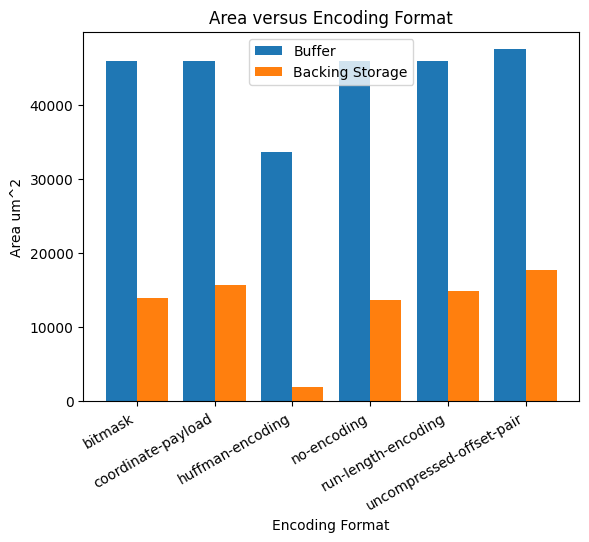

In [77]:
X_axis = np.arange(len(buffer['Encoding'])) 
  
plt.bar(X_axis - 0.2, buffer['Area'], 0.4, label = 'Buffer') 
plt.bar(X_axis + 0.2, backingstorage['Area'], 0.4, label = 'Backing Storage') 
  
plt.xticks(X_axis, buffer['Encoding'], rotation=30, ha='right')
plt.xlabel("Encoding Format") 
plt.ylabel("Area um^2") 
plt.title("Area versus Encoding Format") 
plt.legend() 
plt.show() 

/tmp/ipykernel_18491/758427144.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(density, energy[encoding]['Compute'], 'o-', label = encoding, ls=ls[i], color=color[j])


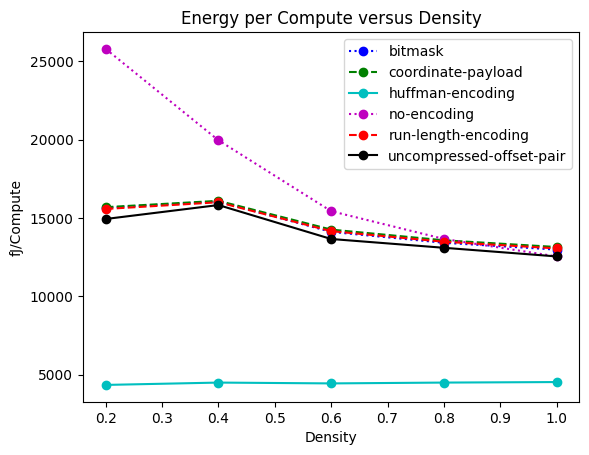

In [78]:
density = [0.2, 0.4, 0.6, 0.8, 1.0]
ls = [':', '--', '-', '-.']
color = ['b', 'g', 'c', 'm', 'r', 'k']
i = 0
j = 0
for encoding in energy.keys():
    if "10" not in encoding:
        plt.plot(density, energy[encoding]['Compute'], 'o-', label = encoding, ls=ls[i], color=color[j])
        i = (i+1) % 3
        j = (j+1) % 6


plt.xlabel("Density") 
plt.ylabel("fJ/Compute") 
plt.title("Energy per Compute versus Density") 
plt.legend() 
plt.show() 

/tmp/ipykernel_18491/3700941481.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(density, energy[encoding]['Algo-Compute'],'o-' ,label = encoding, ls=ls[i], color=color[j])


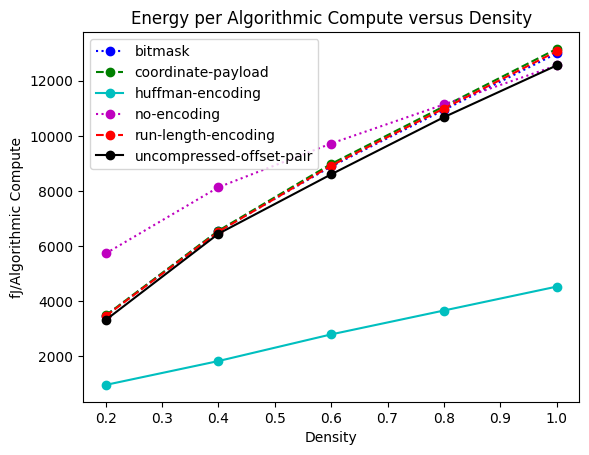

In [80]:
density = [0.2, 0.4, 0.6, 0.8, 1.0]
ls = [':', '--', '-', '-.']
color = ['b', 'g', 'c', 'm', 'r', 'k']
i = 0
j = 0
for encoding in energy.keys():
    if "10" not in encoding:
        plt.plot(density, energy[encoding]['Algo-Compute'],'o-' ,label = encoding, ls=ls[i], color=color[j])
        i = (i+1) % 3
        j = (j+1) % 6

plt.xlabel("Density") 
plt.ylabel("fJ/Algorithmic Compute") 
plt.title("Energy per Algorithmic Compute versus Density") 
plt.legend() 
plt.show() 

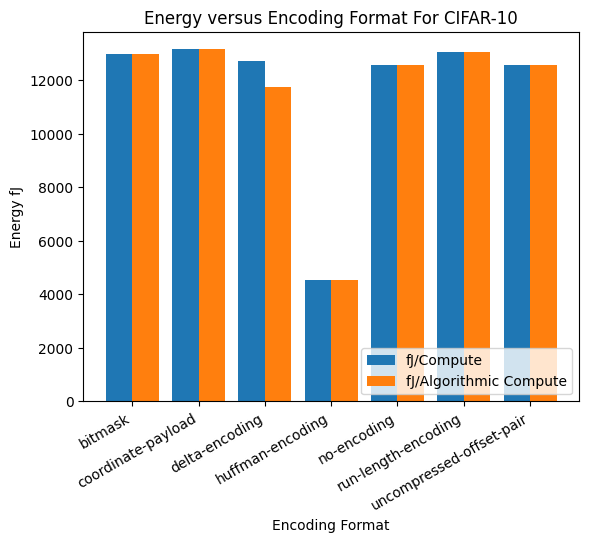

In [42]:
X_axis = np.arange(len(cifar_10['Encoding'])) 
  
plt.bar(X_axis - 0.2, cifar_10['Compute'], 0.4, label = 'fJ/Compute') 
plt.bar(X_axis + 0.2, cifar_10['Algo-Compute'], 0.4, label = 'fJ/Algorithmic Compute') 
  
plt.xticks(X_axis, cifar_10['Encoding'], rotation=30, ha='right')
plt.xlabel("Encoding Format") 
plt.ylabel("Energy fJ") 
plt.title("Energy versus Encoding Format For CIFAR-10") 
plt.legend(loc='lower right') 
plt.show() 